In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import pandas as pd

from nudca.utils import NuclideSorter

# Example usage for testing: sort and print nuclides with mass number 237
df = pd.read_csv("../data/ENDF-B-VIII.1_decay.csv")
# df = df[df['A'] == 237]
sorter = NuclideSorter(df)
# sorted_nuclides = sorter.topological_sort()

sorted_df = sorter.sort_nuclides_decay_chains()
print(sorted_df)


     Radionuclide Element    Z    A Metastable_State  Atomic_Mass  Is_Stable  \
0         Ds-279M      Ds  110  279                M   279.159009      False   
1          Ds-273      Ds  110  273              NaN   273.148977      False   
2          Mt-273      Mt  109  273              NaN   273.145044      False   
3          Hs-273      Hs  108  273              NaN   273.142118      False   
4          Rg-272      Rg  111  272              NaN   272.153727      False   
...           ...     ...  ...  ...              ...          ...        ...   
3816          H-3       H    1    3              NaN     3.016050      False   
3817         He-3      He    2    3              NaN     3.016030       True   
3818          H-2       H    1    2              NaN     2.014103       True   
3819         Nn-1      Nn    0    1              NaN     1.008665      False   
3820          H-1       H    1    1              NaN     1.007825       True   

      Half_Life_Second Half_Life_Readab

In [3]:



from pathlib import Path
import numpy as np
import pandas as pd

from nudca.decay_database import load_decay_database
from nudca.utils import HalfLifeColorMap

# df_endf = pd.read_csv(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.csv'))
# print(df_endf[df_endf['Half_Life_Second'] <= 0])

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
half_life_color_map = HalfLifeColorMap(decay_database.half_life_data)

print(half_life_color_map.min_half_life)


print(decay_database.nuclides[3486])



(array([3486]),)
Mg-19


/tmp/ipykernel_22501/860167869.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykernel_22501/860167869.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykernel_22501/860167869.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykernel_22501/860167869.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykern

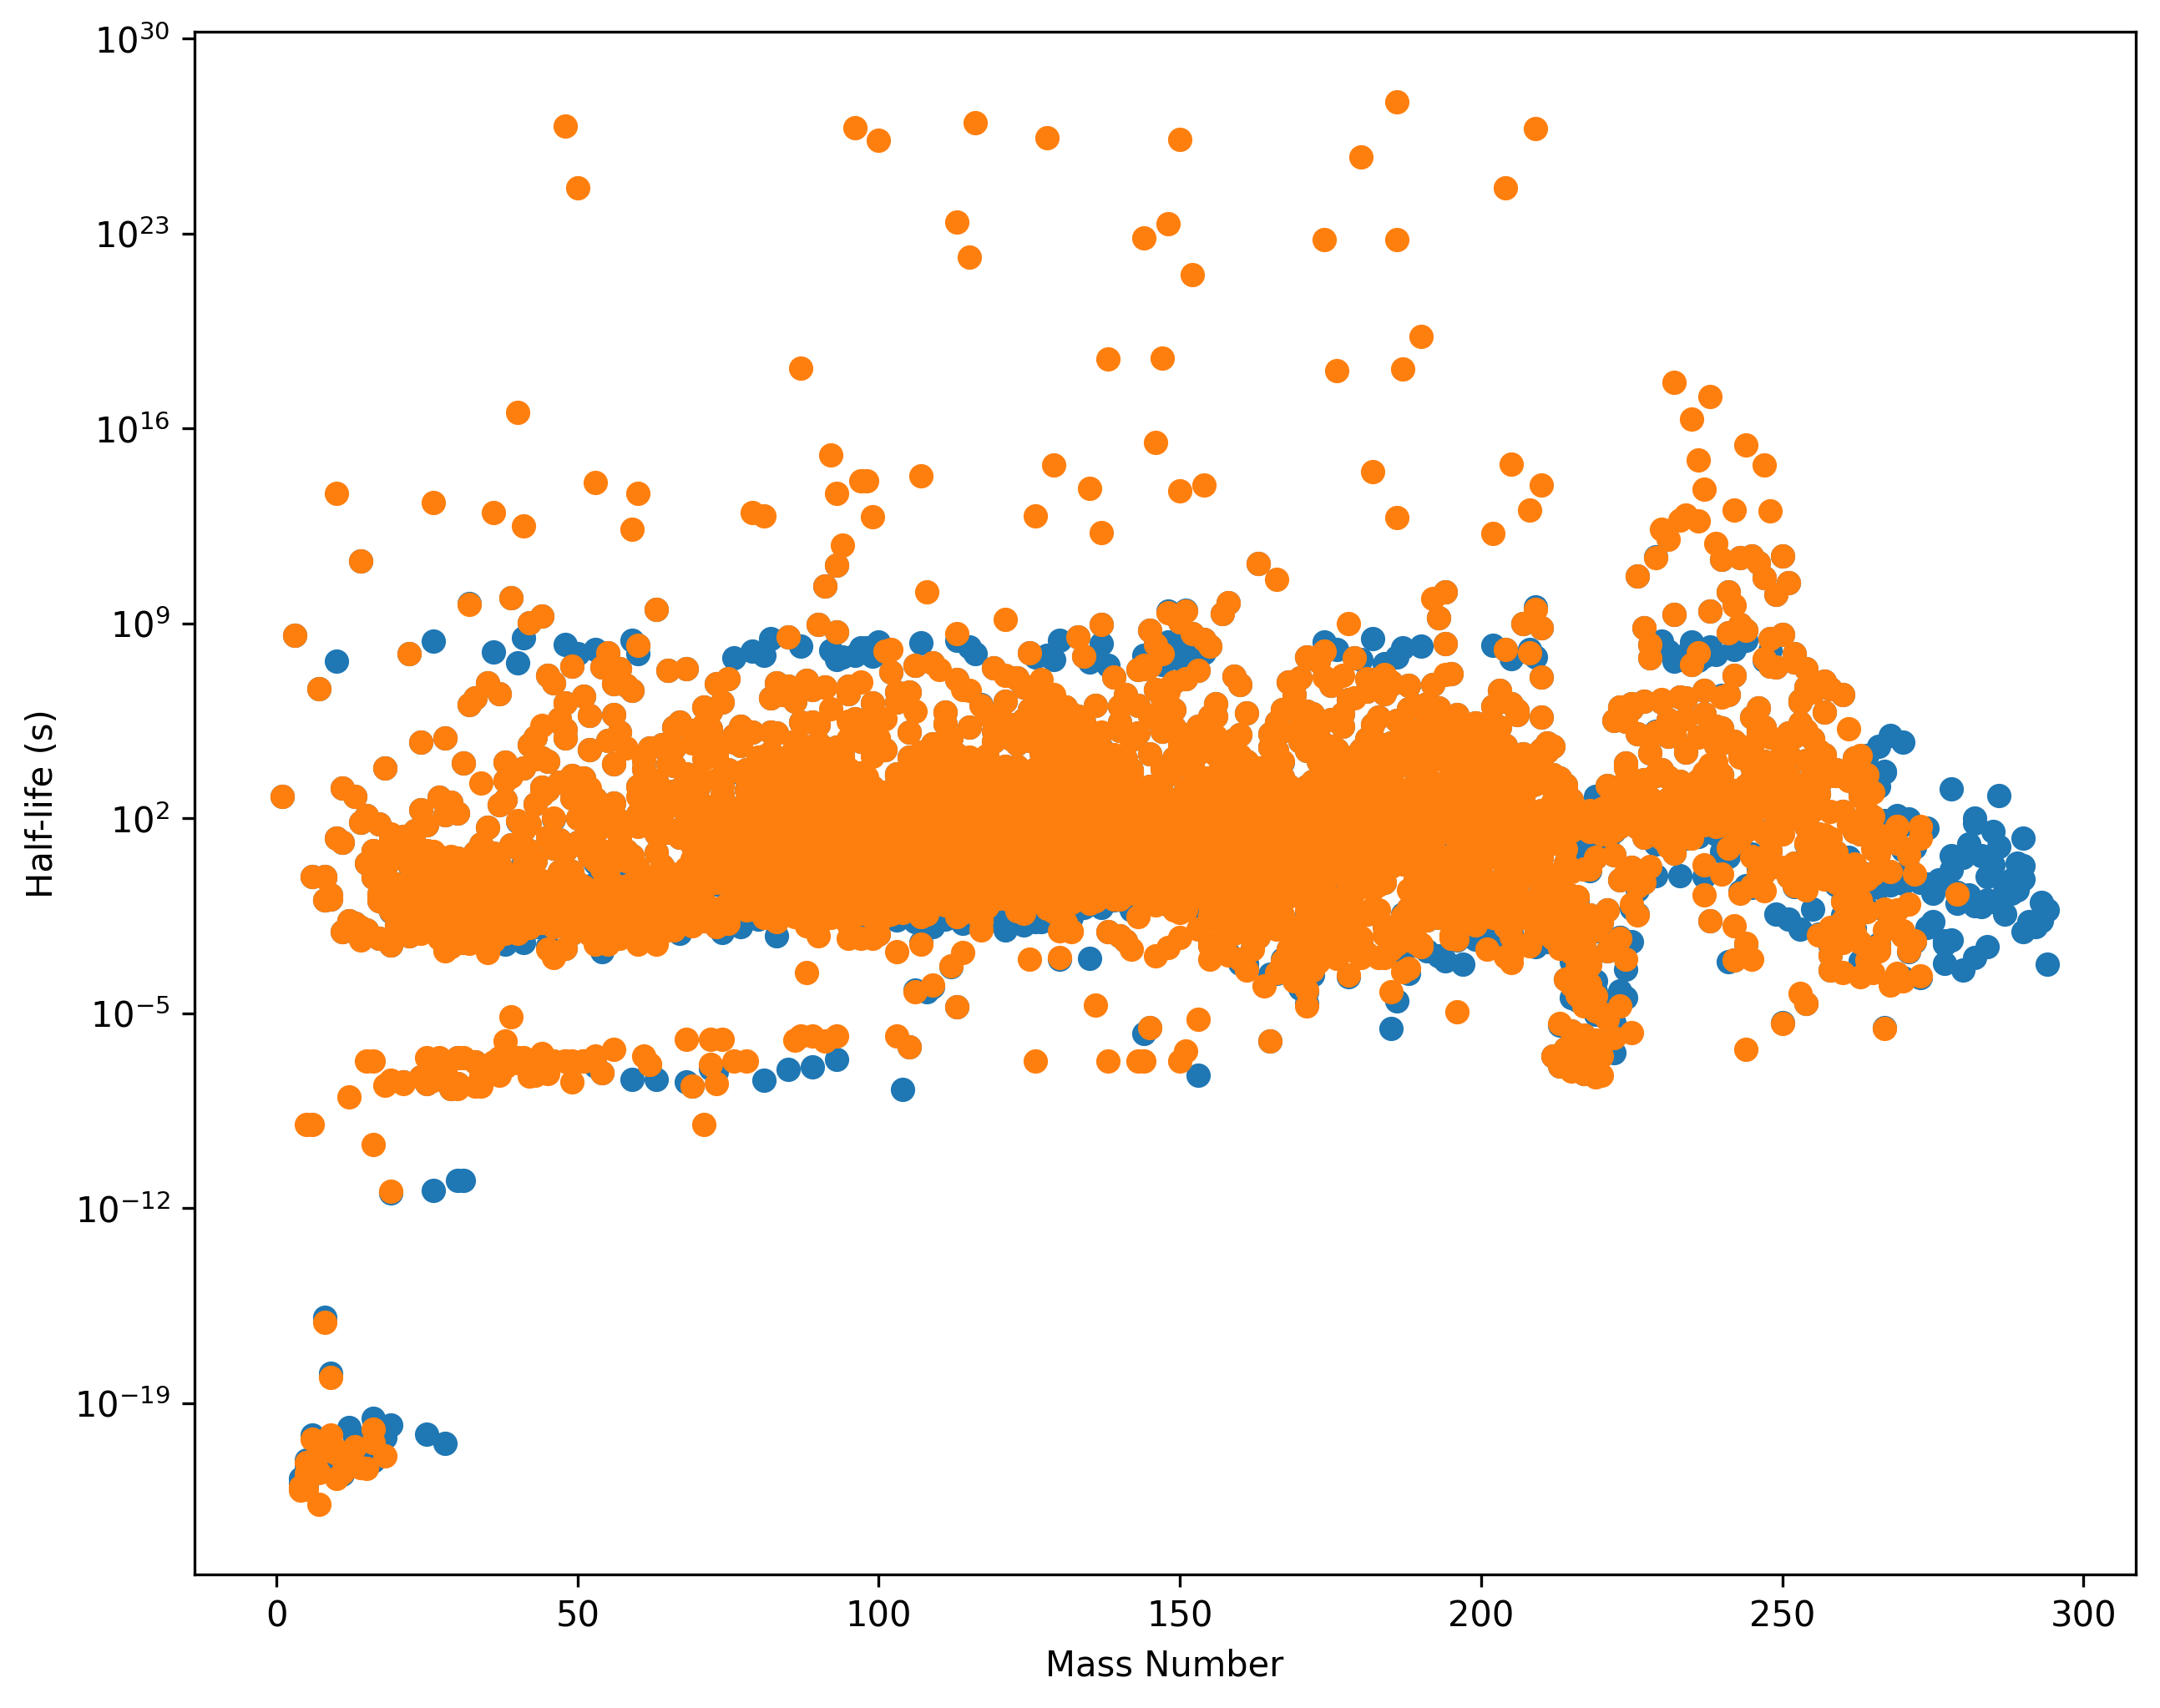

In [13]:
df_endf = pd.read_csv(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.csv'))
df_endf.sort_values(by='A', ascending=True, inplace=True)
df_endf = df_endf[~df_endf['Half_Life_Second'].isna() & (df_endf['Half_Life_Second'] != np.inf)]


A_endf = df_endf['A']


fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

A_nndc = df_nndc['n'] + df_nndc['z']
ax.scatter(A_nndc, df_nndc["halflife_in_seconds"])
ax.scatter(A_endf, df_endf["Half_Life_Second"])

ax.set_xlabel("Mass Number")
ax.set_ylabel("Half-life (s)")
ax.set_yscale("log")

plt.show()

In [16]:
df_nndc['A'] = df_nndc['n'] + df_nndc['z']
df_endf['A'] = df_endf['A']

# 找到共同的核素
common_A = set(df_nndc['A']).intersection(df_endf['A'])

print(common_A)


# # 筛选共同核素的数据
# df_nndc_common = df_nndc[df_nndc['A'].isin(common_A)].sort_values('A')
# df_endf_common = df_endf[df_endf['A'].isin(common_A)].sort_values('A')

# # 合并数据集
# merged = pd.merge(
#     df_nndc_common[['A', 'halflife_in_seconds']],
#     df_endf_common[['A', 'Half_Life_Second']],
#     on='A',
#     suffixes=('_nndc', '_endf')
# )


# merged['residual'] = np.log10(merged['Half_Life_Second']) - np.log10(merged['halflife_in_seconds'])

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), dpi=300, gridspec_kw={'height_ratios': [3, 1]})

# ax1.scatter(merged['A'], merged['halflife_in_seconds'], label='NNDC', alpha=0.7)
# ax1.scatter(merged['A'], merged['Half_Life_Second'], label='ENDF', alpha=0.7)
# ax1.set_yscale('log')
# ax1.set_xlabel('Mass Number (A)')
# ax1.set_ylabel('Half-life (s)')
# ax1.legend()
# ax1.grid()



# ax2.scatter(merged['A'], merged['residual'], color='red', alpha=0.7)
# ax2.axhline(0, color='black', linestyle='--')
# ax2.set_xlabel('Mass Number (A)')
# ax2.set_ylabel('Residual (log scale)')
# ax2.grid()

# # 显示图表
# plt.tight_layout()
# plt.show()



{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

In [1]:

import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))


from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hbar = 6.582e-22  # MeV·s

unit_to_seconds = {
    "s": 1,
    "ms": 1e-3,
    "us": 1e-6,
    "ns": 1e-9,
    "ps": 1e-12,
    "fs": 1e-15,
    "m": 60,
    "h": 3600,
    "d": 86400,
    "y": 31536000,
}

def process_halflife(value):
    if not isinstance(value, str):
        return value
    if value == "STABLE":
        return value
    match = pd.Series([value]).astype(str).str.extract(r'(\d+\.?\d*)')
    return float(match[0]) if not match.isna().iloc[0, 0] else None


def convert_halflife(halflife, unit):
    try:
        energy = float(halflife)
        if unit in ["MeV", "keV", "eV"]:
            factor = {"MeV": 1, "keV": 1e-3, "eV": 1e-6}.get(unit, 1)
            return hbar / (energy * factor)
        elif unit in unit_to_seconds:
            return energy * unit_to_seconds[unit]
        else:
            return halflife
    except (ValueError, TypeError):
        return halflife 


columns_to_read = ['n', 'z', 'name', 'halflife', 'halflifeUnit']
df_nndc = pd.read_csv(Path.cwd().resolve().parent.joinpath('data/nndc.csv'), usecols=columns_to_read)

df_nndc = df_nndc.drop_duplicates(subset=['name'])
df_nndc['halflife'] = df_nndc['halflife'].apply(process_halflife)
# df_nndc = df_nndc[~df_nndc['halflife'].isna() & (df_nndc['halflife'] != "STABLE")]
df_nndc['halflife_in_seconds'] = df_nndc.apply(
    lambda row: convert_halflife(row['halflife'], row['halflifeUnit']),
    axis=1
)

# df_nndc.to_csv(Path.cwd().resolve().parent.joinpath('data/nndc_new.csv'), index=False)

df_endf = pd.read_csv(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.csv'))
df_endf.sort_values(by='A', ascending=True, inplace=True)
# df_endf = df_endf[~df_endf['Half_Life_Second'].isna() & (df_endf['Half_Life_Second'] != np.inf)]


/tmp/ipykernel_28270/4180190965.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykernel_28270/4180190965.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykernel_28270/4180190965.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipykernel_28270/4180190965.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(match[0]) if not match.isna().iloc[0, 0] else None
/tmp/ipy

In [9]:
df_nndc['A'] = df_nndc['n'] + df_nndc['z']
df_endf['A'] = df_endf['A']
common_A = set(df_nndc['A']).intersection(df_endf['A'])

df_nndc_common = df_nndc[df_nndc['A'].isin(common_A)].sort_values('A')
df_endf_common = df_endf[df_endf['A'].isin(common_A)].sort_values('A')

df_endf_common['Half_Life_ENDF'] = df_endf_common['Half_Life_Second']
df_endf_common['Half_Life_NNDC'] = df_nndc_common['halflife_in_seconds']

print(df_endf_common['Half_Life_NNDC'])
print(df_endf_common['Half_Life_ENDF'])


3820     12553920.0
3819        35712.0
3817            NaN
3816         1080.0
3815            NaN
           ...     
4               0.0
2               0.0
3               0.0
1       388589745.6
0             608.9
Name: Half_Life_NNDC, Length: 3820, dtype: object
3820    6.139000e+02
3819             inf
3817    3.887896e+08
3816             inf
3815    9.906520e-23
            ...     
4       4.100000e-03
2       2.000000e+01
3       5.000000e+01
1       2.250000e-04
0       1.900000e-01
Name: Half_Life_ENDF, Length: 3820, dtype: float64


In [3]:
print(3153600000000000 / 1e16)


0.31536


In [6]:
print(1.20E+15 * 365.25 * 24. * 60. * 60.)

3.786912e+22
